<a href="https://colab.research.google.com/github/AkibCoding/Mosquito-Classification-Using-Resnet50/blob/main/MosquitoPre2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU is available and being used for training.
Found 1200 images belonging to 3 classes.
Found 300 files belonging to 3 classes.
Epoch 1/30
38/38 [==============================] - 127s 2s/step - loss: 1.1618 - accuracy: 0.4858 - val_loss: 0.7885 - val_accuracy: 0.6233
Epoch 2/30
38/38 [==============================] - 15s 383ms/step - loss: 0.8400 - accuracy: 0.6242 - val_loss: 0.6996 - val_accuracy: 0.6867
Epoch 3/30
38/38 [==============================] - 14s 370ms/step - loss: 0.7378 - accuracy: 0.6567 - val_loss: 0.6345 - val_accuracy: 0.7367
Epoch 4/30
38/38 [==============================] - 14s 370ms/step - loss: 0.6885 - accuracy: 0.6967 - val_loss: 0.6145 - val_accuracy: 0.7400
Epoch 5/30
38/38 [==============================] - 14s 377ms/step - loss: 0.6178 - accuracy: 0.7342 - val_loss: 0.5695 - val_accuracy: 0.7800
Epoch 6/30
38/38 [==============================] - 14s 370ms/step - loss: 0.5768 - accuracy: 0.7533 - val_loss: 0.5501 - val_accuracy: 0.7867
Epoch 7/30
38/38

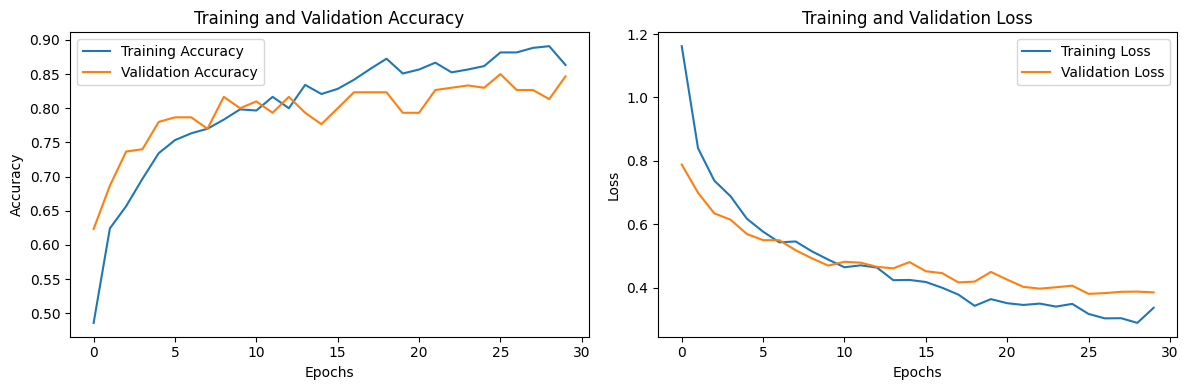

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define your dataset directories
train_data_dir = '/content/drive/MyDrive/datasets/Mosquito Dataset/train'
val_data_dir = '/content/drive/MyDrive/datasets/Mosquito Dataset/test'

# Image dimensions
img_height, img_width = 180, 180
batch_size = 32

import tensorflow as tf

# Check if GPU is available and being used
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used for training.")
else:
    print("GPU is not available. Training on CPU.")

# Load the dataset with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

num_classes = len(train_ds.class_indices)

# Define the model
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet'
)

model = Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout regularization
    layers.Dense(num_classes, activation='softmax')  # Output layer with 'num_classes' units
])

# Freeze the pretrained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.0001)  # Changed learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


GPU is available and being used for training.
Found 1200 images belonging to 3 classes.
Found 300 files belonging to 3 classes.
Epoch 1/100
38/38 [==============================] - 19s 393ms/step - loss: 1.1563 - accuracy: 0.4750 - val_loss: 0.8277 - val_accuracy: 0.6300
Epoch 2/100
38/38 [==============================] - 15s 400ms/step - loss: 0.8271 - accuracy: 0.6350 - val_loss: 0.7165 - val_accuracy: 0.6633
Epoch 3/100
38/38 [==============================] - 14s 368ms/step - loss: 0.7664 - accuracy: 0.6500 - val_loss: 0.6283 - val_accuracy: 0.7133
Epoch 4/100
38/38 [==============================] - 14s 372ms/step - loss: 0.6749 - accuracy: 0.6983 - val_loss: 0.6120 - val_accuracy: 0.7233
Epoch 5/100
38/38 [==============================] - 14s 370ms/step - loss: 0.6280 - accuracy: 0.7250 - val_loss: 0.5991 - val_accuracy: 0.7367
Epoch 6/100
38/38 [==============================] - 14s 373ms/step - loss: 0.5940 - accuracy: 0.7433 - val_loss: 0.5654 - val_accuracy: 0.7533
Epoch 7/

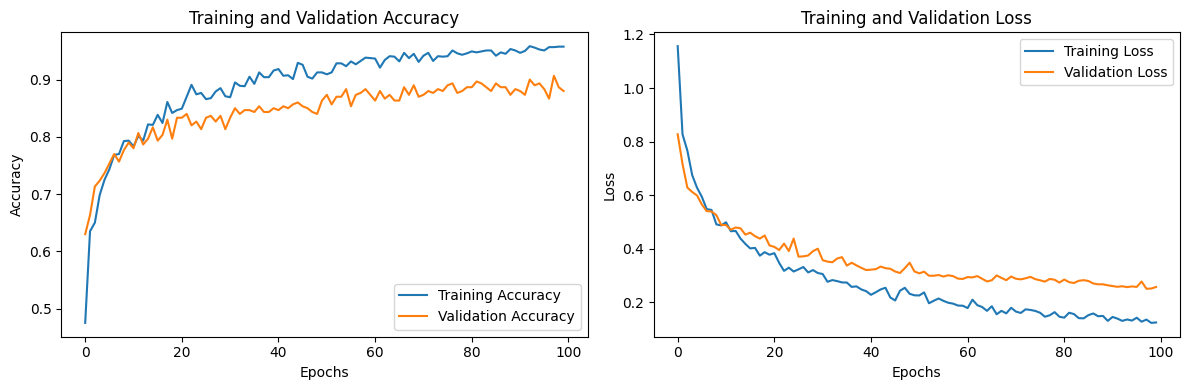

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define your dataset directories
train_data_dir = '/content/drive/MyDrive/datasets/Mosquito Dataset/train'
val_data_dir = '/content/drive/MyDrive/datasets/Mosquito Dataset/test'

# Image dimensions
img_height, img_width = 180, 180
batch_size = 32

import tensorflow as tf

# Check if GPU is available and being used
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used for training.")
else:
    print("GPU is not available. Training on CPU.")

# Load the dataset with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

num_classes = len(train_ds.class_indices)

# Define the model
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet'
)

model = Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout regularization
    layers.Dense(num_classes, activation='softmax')  # Output layer with 'num_classes' units
])

# Freeze the pretrained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.0001)  # Changed learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


GPU is available and being used for training.
Found 1200 images belonging to 3 classes.
Found 300 files belonging to 3 classes.
Epoch 1/200
38/38 [==============================] - 46s 1s/step - loss: 1.2073 - accuracy: 0.4592 - val_loss: 0.7805 - val_accuracy: 0.6733
Epoch 2/200
38/38 [==============================] - 36s 959ms/step - loss: 0.8646 - accuracy: 0.6133 - val_loss: 0.7150 - val_accuracy: 0.6933
Epoch 3/200
38/38 [==============================] - 38s 1s/step - loss: 0.7603 - accuracy: 0.6583 - val_loss: 0.6335 - val_accuracy: 0.7467
Epoch 4/200
38/38 [==============================] - 37s 984ms/step - loss: 0.6296 - accuracy: 0.7292 - val_loss: 0.5957 - val_accuracy: 0.7567
Epoch 5/200
38/38 [==============================] - 42s 1s/step - loss: 0.5893 - accuracy: 0.7342 - val_loss: 0.5642 - val_accuracy: 0.7900
Epoch 6/200
38/38 [==============================] - 20s 521ms/step - loss: 0.5538 - accuracy: 0.7792 - val_loss: 0.5488 - val_accuracy: 0.7867
Epoch 7/200
38/38

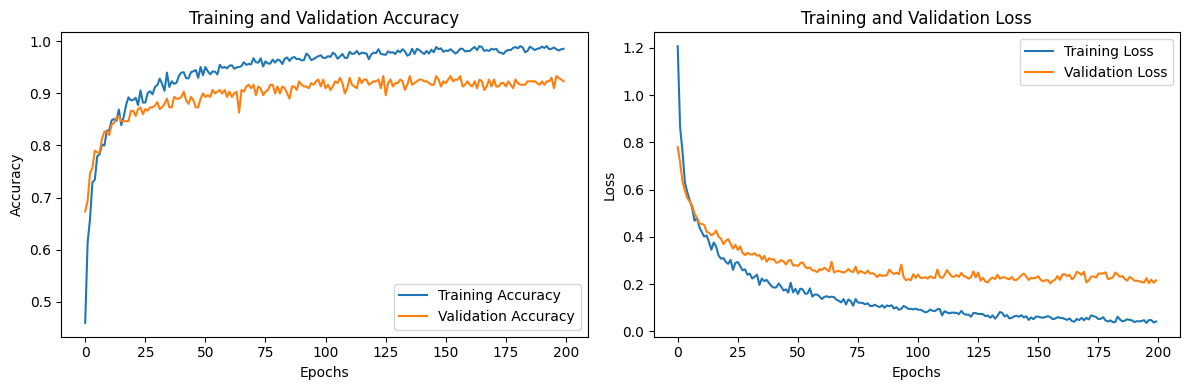

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define your dataset directories
train_data_dir = '/content/drive/MyDrive/datasets/Mosquito Dataset/train'
val_data_dir = '/content/drive/MyDrive/datasets/Mosquito Dataset/test'

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

import tensorflow as tf

# Check if GPU is available and being used
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used for training.")
else:
    print("GPU is not available. Training on CPU.")

# Load the dataset with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

num_classes = len(train_ds.class_indices)

# Define the model
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet'
)

model = Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout regularization
    layers.Dense(num_classes, activation='softmax')  # Output layer with 'num_classes' units
])

# Freeze the pretrained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.0001)  # Changed learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 200

# ModelCheckpoint callback to save the best model during training
checkpoint_path = '/content/drive/MyDrive/mos_model'  # Change the path as needed
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=False,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint]  # Include the ModelCheckpoint callback
)

# Get the model name
model_name = checkpoint_path.split('/')[-1]

# Print the model name along with its accuracy
print(f"Model {model_name} saved with Validation Accuracy: {max(history.history['val_accuracy']):.4f}")

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(train_ds.class_indices)



{'Aedes aegypti': 0, 'Aedes albopictus': 1, 'Culex quinquefasciatus': 2}


1/1 [==============================] - 1s 923ms/step
Confusion Matrix:
[[0.86 0.12 0.02]
 [0.03 0.94 0.03]
 [0.01 0.02 0.97]]


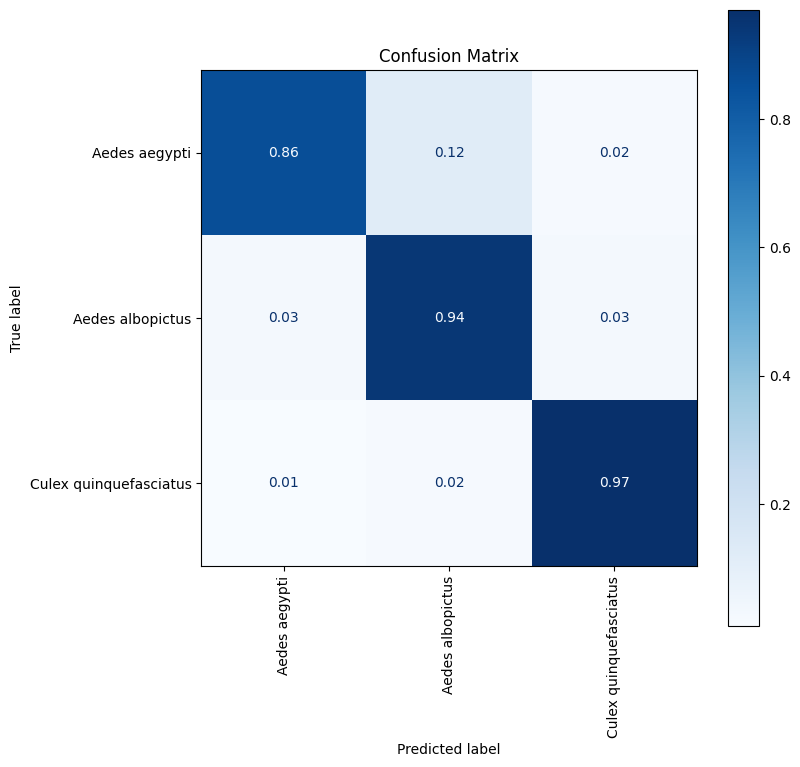

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names manually
class_names = ['Aedes aegypti', 'Aedes albopictus', 'Culex quinquefasciatus']

# Get the true labels and predictions for the validation set
val_true_labels = []
val_predictions = []

for images, labels in val_ds:
    val_true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    val_predictions.extend(np.argmax(predictions, axis=1))

# Create the confusion matrix
cm = confusion_matrix(val_true_labels, val_predictions, normalize='true')

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import drive
from google.colab import files
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving 25s.jpg to 25s.jpg
1/1 [==============================] - 1s 898ms/step


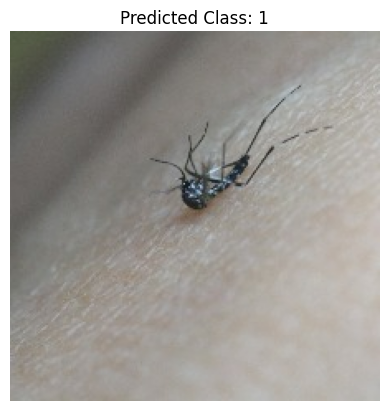

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


# Define the path to the saved model files in Google Drive
model_path = '/content/drive/MyDrive/mos_model'

# Load the model
model = tf.keras.models.load_model(model_path)

# Define the image dimensions
img_height, img_width = 224, 224  # Adjust these dimensions based on your model requirements

# Define the prediction function
def predict_image_class(image):
    resized_image = cv2.resize(image, (img_height, img_width))
    img_array = np.expand_dims(resized_image, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    # You can directly use class_index or modify as needed for your application
    return class_index


# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction = predict_image_class(img)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction}')
    plt.show()


Saving 107.jpg to 107.jpg
1/1 [==============================] - 0s 24ms/step


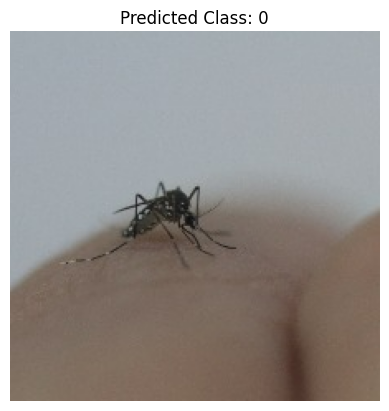

In [ ]:
# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction = predict_image_class(img)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction}')
    plt.show()

Saving 37s.jpg to 37s.jpg
1/1 [==============================] - 0s 23ms/step


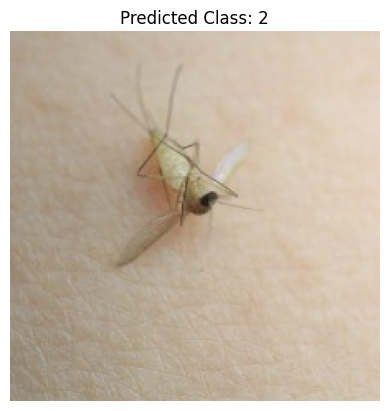

In [ ]:
# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)
    prediction = predict_image_class(img)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction}')
    plt.show()